## Titanic Intro to Kaggle dataset

### Link
https://www.kaggle.com/jorgemarcher/my-first-titanic-notebook

## Ideas for Improvments
### Classifying by age
Age is a good indicator of survival, however, its likely that theres more of a stepwise relationship between age groups and survival than a linear one. We can test this by looking at the correlation between age groups and survival.

### Discovering families
Siblings and children may have a higher chance of survival if one is a survivor. We can use the SibSp and ParCh columns along with age to define who parents and children are, then use indicators of whether a parent survived to predict whether a child would survive.


In [78]:
import pandas as pd;
import numpy as np;
from matplotlib import pyplot as plt;

df = pd.read_csv("./train.csv");


In [79]:
from sklearn.preprocessing import OneHotEncoder

def one_hot(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name, drop_first=True)
    df = df.drop(column_name, 1);
    df = pd.concat([df, dummies], 1);
    return df

x = df.drop(["Name", "Ticket", "Cabin", "PassengerId"], 1)
x["Age"].fillna(0, inplace=True);
x = one_hot(x, "Sex");
x = one_hot(x, "Embarked");
x.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,0.0,0,0,8.4583,1,1,0
6,0,1,54.0,0,0,51.8625,1,0,1
7,0,3,2.0,3,1,21.0750,1,0,1
8,1,3,27.0,0,2,11.1333,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,0


In [80]:
corr = x.corr();
corr.style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,0.010539,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.361353,0.083081,0.018443,-0.549500,0.131900,0.221009,0.081720
Age,0.010539,-0.361353,1.000000,-0.184664,-0.048786,0.135516,0.024978,-0.237586,0.140578
SibSp,-0.035322,0.083081,-0.184664,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.070941
Parch,0.081629,0.018443,-0.048786,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.063036
Fare,0.257307,-0.549500,0.135516,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.166603
Sex_male,-0.543351,0.131900,0.024978,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.125722
Embarked_Q,0.003650,0.221009,-0.237586,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,0.140578,0.070941,0.063036,-0.166603,0.125722,-0.496624,1.000000


We see stronger correlations to survival with Sex, class, and fare. This is intuitively makes sense, as the story with the Titanic is that the Men stayed on board while women and children boarded lifeboats, while class decided who was in the higher decks and able to get a head start on the flooding. Fare correlates negatively with class, higher classes (class 3 means 3rd class) paid lower fares.

In [81]:
from sklearn import tree;
from sklearn.model_selection import cross_validate;

y = df["Survived"]
x = x.drop("Survived", 1)
clf = tree.DecisionTreeClassifier(max_depth=3)
# clf.fit(x, y)
cross_validate(clf, x, y, scoring=["accuracy"])


{'fit_time': array([0.00277472, 0.00312209, 0.00248504, 0.00199056, 0.00196862]),
 'score_time': array([0.00161433, 0.00157976, 0.00105381, 0.00110221, 0.00176954]),
 'test_accuracy': array([0.81564246, 0.80337079, 0.80898876, 0.78651685, 0.81460674])}

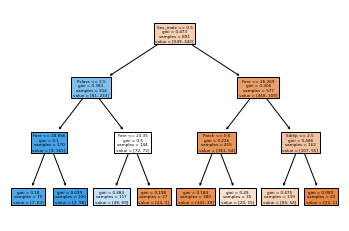

In [82]:
clf.fit(x, y)
dot_data = tree.plot_tree(clf, feature_names=x.columns, filled=True)